In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/carminematacena/Desktop/Forecasting/ar-7-patagonia/current (2).csv')

# Clean the DataFrame by removing the row with transformation codes
df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
df_cleaned

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5528,24.3936,23.1231,32.5925,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2023-09-01,19111.748,15741.9,116.594,1.507530e+06,705304.00000,103.2096,101.0935,101.3665,102.1034,...,120.395,123.976,29.90,34.55,26.62,67.9,508808.61,913938.95,5074.6108,15.0424
777,2023-10-01,19145.402,15784.6,116.663,1.505477e+06,703528.00000,102.3722,100.5292,100.5527,101.1664,...,120.040,124.228,29.97,34.67,26.65,63.8,513229.64,918210.64,5015.5456,19.0462
778,2023-11-01,19213.108,15859.9,117.127,1.514733e+06,703336.00000,102.6710,100.9362,101.2159,101.8557,...,119.325,124.551,30.26,34.96,26.89,61.3,517434.30,922552.40,4999.7208,13.8563
779,2023-12-01,19251.946,15899.0,117.773,1.530296e+06,706180.00000,102.6715,100.8332,101.2843,101.9884,...,119.193,124.917,30.45,35.01,27.14,69.7,522366.13,928336.14,5077.4222,12.6960


In [4]:
# Extract transformation codes
transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']

In [5]:
import numpy as np

# Function to apply transformations based on the transformation code
def apply_transformation(series, code):
    if code == 1:
        # No transformation
        return series
    elif code == 2:
        # First difference
        return series.diff()
    elif code == 3:
        # Second difference
        return series.diff().diff()
    elif code == 4:
        # Log
        return np.log(series)
    elif code == 5:
        # First difference of log
        return np.log(series).diff()
    elif code == 6:
        # Second difference of log
        return np.log(series).diff().diff()
    elif code == 7:
        # Delta (x_t/x_{t-1} - 1)
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")

# Applying the transformations to each column in df_cleaned based on transformation_codes
for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))


df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head(8)

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014306,0.006035,0.004894,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021075,0.014338,0.014545,0.015650,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014955,0.008270,0.009582,0.004770,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001141,0.007034,0.007128,-0.004767,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024240,0.001168,0.008249,0.013054,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN
5,1959-08-01,-0.005653,-0.005755,0.005998,-0.052521,0.006364,-0.034465,-0.007026,-0.002349,0.001180,...,0.000870,-0.000689,0.000000,0.003945,-0.009615,NaN,-0.000472,-0.000502,-0.025495,NaN
6,1959-09-01,0.000763,0.000000,0.010001,0.014660,-0.013157,-0.001211,-0.004712,-0.003536,-0.003538,...,0.000702,0.000088,0.000000,-0.003992,0.014435,NaN,-0.013088,-0.006685,0.016333,NaN
7,1959-10-01,0.001271,0.001170,-0.006825,0.001620,0.007288,-0.007290,-0.002364,-0.004732,-0.004742,...,-0.000223,0.000375,0.000000,0.003898,-0.009639,NaN,-0.001601,-0.003007,-0.003397,NaN


In [6]:
indpro = df_cleaned['INDPRO']
indpro

0      0.014306
1      0.021075
2      0.014955
3      0.001141
4     -0.024240
         ...   
774    0.000926
775   -0.008147
776    0.002915
777    0.000005
778   -0.000951
Name: INDPRO, Length: 779, dtype: float64

In [8]:
import numpy as np
import scipy 
def unconditional_ar_mean_variance(c, phis, sigma2):
    ## The length of phis is p
    p = len(phis)
    A = np.zeros((p, p))
    A[0, :] = phis
    A[1:, 0:(p-1)] = np.eye(p-1)
    ## Check for stationarity
    eigA = np.linalg.eig(A)
    if all(np.abs(eigA.eigenvalues)<1):
        stationary = True
    else:
        stationary = False
    # Create the vector b
    b = np.zeros((p, 1))
    b[0, 0] = c
    
    # Compute the mean using matrix algebra
    I = np.eye(p)
    mu = np.linalg.inv(I - A) @ b
    
    # Solve the discrete Lyapunov equation
    Q = np.zeros((p, p))
    Q[0, 0] = sigma2
    #Sigma = np.linalg.solve(I - np.kron(A, A), Q.flatten()).reshape(7, 7)
    Sigma = scipy.linalg.solve_discrete_lyapunov(A, Q)
    
    return mu.ravel(), Sigma, stationary

In [9]:
from scipy.stats import norm
from scipy.stats import multivariate_normal
import numpy as np

def lagged_matrix(Y, max_lag=7):
    n = len(Y)
    lagged_matrix = np.full((n, max_lag), np.nan)    
    # Fill each column with the appropriately lagged data
    for lag in range(1, max_lag + 1):
        lagged_matrix[lag:, lag - 1] = Y[:-lag]
    return lagged_matrix


def cond_loglikelihood_ar7(params, y):
    cc = params[0] 
    phic = params[1:8]
    sigma2c = params[8]
    mu, Sigma, stationary = unconditional_ar_mean_variance(cc, phic, sigma2c)
    ## We could check that at phis the process is stationary and return -Inf if it is not
    if not(stationary):
        return -np.inf
    ## The distribution of 
    # y_t|y_{t-1}, ..., y_{t-7} ~ N(c+\phi_{1}*y_{t-1}+...+\phi_{7}y_{t-7}, sigma2)
    ## Create lagged matrix
    X = lagged_matrix(y, 7)
    yf = y[7:]
    Xf = X[7:,:]
    loglik = np.sum(norm.logpdf(yf, loc=(cc + Xf@phic), scale=np.sqrt(sigma2c)))
    return loglik

def uncond_loglikelihood_ar7(params, y):
    ## The unconditional loglikelihood
    ## is the unconditional "plus" the density of the
    ## first p (7 in our case) observations
    cloglik = cond_loglikelihood_ar7(params, y)

    ## Calculate initial
    # y_1, ..., y_7 ~ N(mu, sigma_y)
    cu = params[0] 
    phiu = params[1:8]
    sigma2u = params[8]
    mu, Sigma, stationary = unconditional_ar_mean_variance(cu, phiu, sigma2u)
    if not(stationary):
        return -np.inf
    mvn = multivariate_normal(mean=mu, cov=Sigma, allow_singular=True)
    uloglik = cloglik + mvn.logpdf(y[0:7])
    return uloglik

In [57]:
## Unconditional - define the negative loglikelihood

## Starting value. 
## These estimates should be close to the OLS
X = lagged_matrix(indpro, 7)
yf = indpro[7:]
Xf = np.hstack((np.ones((len(indpro)-7,1)), X[7:,:]))
beta = np.linalg.solve(Xf.T@Xf, Xf.T@yf)
sigma2_hat = np.mean((yf - Xf@beta)**2)

params = np.hstack((beta, sigma2_hat))

def cobj(params, y): 
    return - cond_loglikelihood_ar7(params,y)

cond_results = scipy.optimize.minimize(cobj, params, args = indpro, method='L-BFGS-B')
print('Maximized Conditional Likelihood Parameters',cond_results.x)


Maximized Conditional Likelihood Parameters [ 1.25663978e-03  2.93198980e-01 -7.34894401e-02  4.67307848e-02
  4.70762950e-02 -2.59173496e-02  6.13114483e-02  1.91136675e-02
  8.88022999e-05]


/var/folders/m3/55jyrvvx1ld_fkl1r9tzwh540000gn/T/ipykernel_1197/2705466840.py:28: RuntimeWarning: invalid value encountered in sqrt
  loglik = np.sum(norm.logpdf(yf, loc=(cc + Xf@phic), scale=np.sqrt(sigma2c)))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/linalg/_solvers.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.28643e-17): result may not be accurate.
  x = solve(lhs, q.flatten())


In [58]:
## Not the conditional

def uobj(params, indpro): 
    return - uncond_loglikelihood_ar7(params,indpro)

bounds_constant = tuple((-np.inf, np.inf) for _ in range(1))
bounds_phi = tuple((-1, 1) for _ in range(7))
bounds_sigma = tuple((0,np.inf) for _ in range(1))
bounds = bounds_constant + bounds_phi + bounds_sigma

## L-BFGS-B support bounds
uncond_results = scipy.optimize.minimize(uobj, cond_results.x, args = indpro, method='L-BFGS-B', bounds = bounds)
print('Maximized Unconditional Likelihood Parameters',uncond_results.x)

Maximized Unconditional Likelihood Parameters [ 1.23570091e-03  2.93200143e-01 -7.34900194e-02  4.67294713e-02
  4.70751297e-02 -2.59177504e-02  6.13114957e-02  1.91136959e-02
  9.06838376e-05]


## FORECAST CONDITIONAL 

In [50]:
def ar7_forecast(data, phic, cc, sigma2c, num_periods=8):
    
    forecasts = []

    for _ in range(num_periods):
        # Calculate the autoregressive terms
        ar_terms = np.sum(phic * data[-7:])

        # Make the forecast
        forecast = cc + ar_terms + np.random.normal(0, sigma2c)

        # Append the forecast to the list of forecasts
        forecasts.append(forecast)

        # Update the historical data with the new forecast
        data = np.append(data, forecast)

    return forecasts

# Historical data
historical_data = indpro  # Your historical data here

# Coefficients AR(1) to AR(7)
phic = params [1:8]
# Constant term
cc = params [0]
# Standard deviation
sigma2c = params [8]

# Make a forecast for the next 8 periods
forecast_next_8_periods = ar7_forecast(historical_data, phic, cc, sigma2c, num_periods=8)
print('Conditional Forecat', forecast_next_8_periods)


Conditional Forecat [0.0032625955579106943, 0.0006164047695916339, 0.0025847047473606137, -0.0013935185478349305, 0.0024507415858348383, 0.0014968389728440919, 0.0011082381162216528, 0.0023269360959075626]


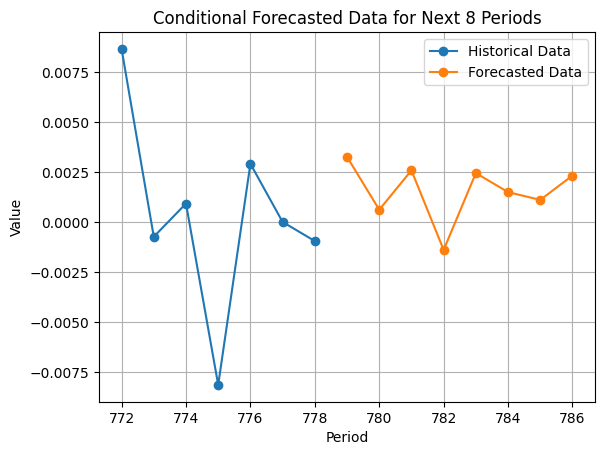

In [53]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.plot(historical_data[-7:], label='Historical Data', marker='o', linestyle='-')

# Plot the forecasted data
num_historical_periods = len(historical_data)
num_forecast_periods = len(forecast_next_8_periods)
plt.plot(range(num_historical_periods, num_historical_periods + num_forecast_periods), forecast_next_8_periods, label='Forecasted Data', marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Conditional Forecasted Data for Next 8 Periods')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()


In [42]:
initial_value=np.mean(indpro[-7:])
initial_value


0.00038169806003945136

In [55]:

# Funzione per fare il forecast utilizzando l'approccio incondizionato
def ar7_unconditional_forecast(initial_value, phiu, cu, sigma2u, num_periods=8):
    # Lista per salvare i forecast
    forecasts = []

    # Per ogni periodo successivo
    for _ in range(num_periods):
        # Calcola il termine autoregressivo
        ar_term = np.sum(phiu * initial_value)
        
        # Fai il forecast per il prossimo periodo
        forecast = cu + ar_term + np.random.normal(0, sigma2u)
        
        # Aggiungi il forecast alla lista dei forecast
        forecasts.append(forecast)
    
    return forecasts  

# Coefficients AR(1) to AR(7)
phiu = params [1:8]
# Constant term
cu = params [0]
# Standard deviation
sigma2u = params [8]


# Fai il forecast per i prossimi 8 periodi
forecast = ar7_unconditional_forecast(initial_value, phiu, cu, sigma2u, num_periods=8)
print("Unconditional Forecast:", forecast)


Unconditional Forecast: [0.0013536134308874044, 0.0013694068432913236, 0.0014249081603322363, 0.0012879884868082201, 0.0014662911107659986, 0.0014763864223420059, 0.0014022325948904004, 0.0014426202302276166]


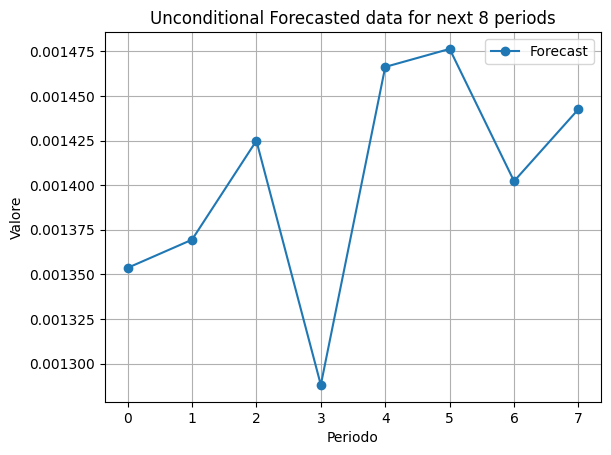

In [56]:
# Plot dei dati forecast
num_forecast_periods = len(forecast)
plt.plot(range(num_forecast_periods), forecast, label='Forecast', marker='o', linestyle='-')

# Settaggio delle etichette e del titolo
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Unconditional Forecasted data for next 8 periods')

# Visualizzazione della legenda
plt.legend()

# Visualizzazione della griglia
plt.grid(True)

# Visualizzazione del plot
plt.show()
